# Iris dataset - Regressão Logística - 3 classes

## Objetivos

Este notebook ilustra o problema de classificação.

O objetivo é classificar as amostras da Íris em 3 classes.
- o alvo é o índice da classe: 0, 1 ou 2
- função de perda é Entropia Cruzada
- rede é uma camada densa linear com duas entradas e três saídas (n. de classes)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmax_CrossEntropy_Otimizacao.png)

## Importação das bibliotecas

In [1]:
%matplotlib inline
import os
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display

## Dataset: Leitura, normalização e visualização dos dados

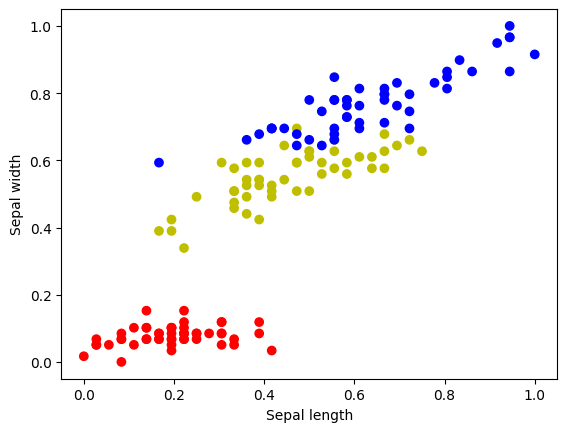

In [2]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
# normalização
Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc/Xs

Y = iris.target
colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [3]:
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Prepara os dados para o PyTorch

In [4]:
X_tensor = torch.FloatTensor(Xc)  # Entrada é FloatTensor
Y_tensor = torch.LongTensor(Y)    # Classe é LongTensor

In [5]:
Y_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## Construindo o modelo da rede

A saída da rede é composta por um neurônio para cada classe. A saída é denominada *scores* ou logitos:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLogisticaRede_2_3.png)

In [6]:
model = nn.Linear(2,3)  # 2 entradas e 3 saídas

In [7]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-0.0698, -0.3741],
                      [ 0.2316,  0.4973],
                      [ 0.2890,  0.6393]])),
             ('bias', tensor([ 0.2392,  0.6838, -0.4527]))])

### Fazendo um predict

In [8]:
out = model(Variable(X_tensor[:4,:])) # 4 amostras
out

tensor([[ 0.1983,  0.7690, -0.3451],
        [ 0.2022,  0.7561, -0.3612],
        [ 0.2124,  0.7349, -0.3881],
        [ 0.2017,  0.7453, -0.3745]], grad_fn=<AddmmBackward0>)

In [9]:
oo = F.softmax(out,dim=1)
oo

tensor([[0.2985, 0.5282, 0.1733],
        [0.3022, 0.5258, 0.1720],
        [0.3091, 0.5213, 0.1696],
        [0.3045, 0.5244, 0.1711]], grad_fn=<SoftmaxBackward0>)

### Calculando as probabilidades com Softmax

- [Wikipedia:Softmax_function](https://en.wikipedia.org/wiki/Softmax_function)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/softmax.png)

In [10]:
F.softmax(out,dim=1)*100

tensor([[29.8484, 52.8174, 17.3342],
        [30.2168, 52.5814, 17.2018],
        [30.9148, 52.1272, 16.9580],
        [30.4478, 52.4381, 17.1141]], grad_fn=<MulBackward0>)

### Predição da classe

In [11]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([1, 1, 1, 1])
tensor([0.5282, 0.5258, 0.5213, 0.5244], grad_fn=<MaxBackward0>)


## Treinamento

### Classe para visualização dinâmica

In [12]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

def predict_prob(model, inputs):
    outputs = model(Variable(inputs))
    outputs = F.softmax(outputs,dim=1)
    predicts, _ = torch.max(outputs, 1)

    return predicts.data.numpy()

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax2.set_title('Fronteiras de decisão')

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax3.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax3.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax3.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                #Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
                Zc = predict(self.model,torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.Paired)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                Zp = predict_prob(self.model,torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.magma)
                colors = np.array(['r','y','b'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

### Laço principal de treinamento da Regressão Logística por Softmax

In [13]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

Final loss: 0.20640665292739868


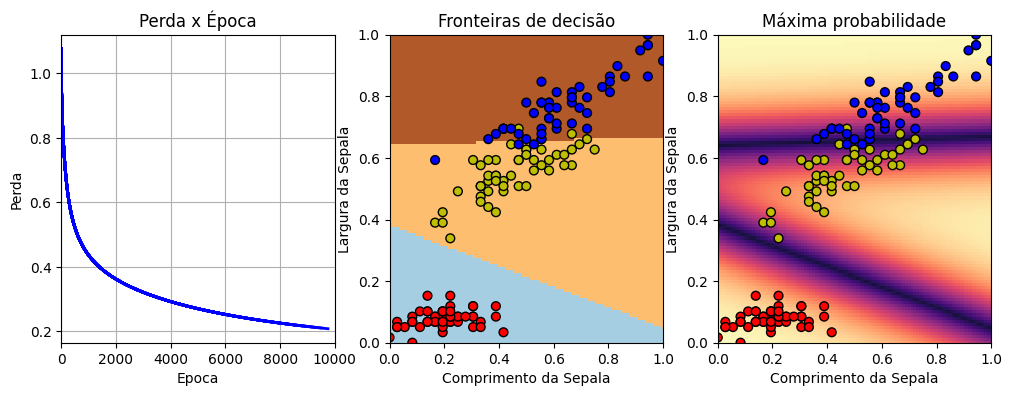

In [14]:
nb_epoch = 10000

#Definindo o plotter
my_plot = MyPlotter(model, Xc, Y, nb_epoch)

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    # calcula a perda
    loss = criterion(output, Variable(Y_tensor))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())

    my_plot.on_epoch_end(i, {'loss': loss.data.item()});
    final_loss = loss.data.item()

print('Final loss:', final_loss)

## Avaliação

### Parâmetros após treinamento

In [15]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ -2.8187, -14.5020],
                      [  1.8993,  -0.4250],
                      [  1.3702,  15.6895]])),
             ('bias', tensor([ 7.1682,  1.7964, -8.4942]))])

### Salvando os parâmetros treinados

In [16]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_Iris.pt')

In [17]:
! ls ../models/

RegrLog_Iris.pt


In [18]:
nn.init.constant(model.weight,0)
model.state_dict()

<ipython-input-18-0d5512203613>:1: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  nn.init.constant(model.weight,0)


OrderedDict([('weight',
              tensor([[0., 0.],
                      [0., 0.],
                      [0., 0.]])),
             ('bias', tensor([ 7.1682,  1.7964, -8.4942]))])

### Recuperando os pesos salvos

In [19]:
param_saved = torch.load('../models/RegrLog_Iris.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight',
              tensor([[ -2.8187, -14.5020],
                      [  1.8993,  -0.4250],
                      [  1.3702,  15.6895]])),
             ('bias', tensor([ 7.1682,  1.7964, -8.4942]))])

### Exatidão (acurácia) do classificador

Acurácia indica o número de acertos sobre o número total de amostras

In [20]:
Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

Training Accuracy:  0.96


### Matriz de confusão

In [21]:
import pandas as pd
pd.crosstab(Y_pred, Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


## Atividades

### Perguntas:

1. Observe que se após o treinamento, a célula for executada novamente, ela continua utilizando os parâmetros treinados até sua última execução. O que é preciso fazer para que o treinamento comece deste o início, como da primeira vez que foi executado?

Se o código estiver em uma única célula de um Jupyter Notebook (ou se você estiver executando o script inteiro novamente), simplesmente executar a célula (ou script) novamente fará com que todas essas reinicializações ocorram na ordem correta, garantindo que o treinamento comece do zero.

2. Experimente refazer o treinamento com diferentes valores de learning rate

In [24]:
learning_rates_to_test = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.5, 1.0]
nb_epoch_experiment = 2000  # Número de épocas reduzido para experimentação rápida
# nb_epoch_experiment = 10000 # Use o número original de épocas para um teste completo

results_lr = {}

criterion = nn.CrossEntropyLoss()

print(f"Iniciando experimento com taxas de aprendizado. Épocas por taxa: {nb_epoch_experiment}\n")

for lr_exp in learning_rates_to_test:
    print(f"--- Treinando com Taxa de Aprendizado (lr): {lr_exp} ---")

    # 1. Reinicializar o Modelo (garante pesos novos a cada vez)
    model_exp = nn.Linear(2,3) # 2 entradas (características), 3 saídas (classes)

    # 2. Reinicializar o Otimizador com a taxa de aprendizado atual
    optimizer_exp = torch.optim.SGD(model_exp.parameters(), lr=lr_exp)

    current_epoch_losses = [] # Lista para perdas desta execução específica
    for epoch in range(nb_epoch_experiment):
        # Forward pass: obter predições
        outputs = model_exp(Variable(X_tensor))

        # Calcular a perda
        loss = criterion(outputs, Variable(Y_tensor))

        # Backward pass: calcular gradientes e otimizar parâmetros
        optimizer_exp.zero_grad() # Zerar gradientes acumulados
        loss.backward()           # Retropropagar o erro
        optimizer_exp.step()      # Atualizar os pesos

        current_epoch_losses.append(loss.data.item())

        # Imprimir progresso menos frequentemente para não poluir a saída
        if (epoch + 1) % (nb_epoch_experiment // 4) == 0 or epoch == nb_epoch_experiment - 1:
            print(f"  LR: {lr_exp}, Época: {epoch+1}/{nb_epoch_experiment}, Perda: {loss.data.item():.4f}")

    # Após o loop de treinamento para a taxa de aprendizado atual
    final_loss_exp = current_epoch_losses[-1]
    Y_pred_exp = predict(model_exp, X_tensor) # Usar o modelo treinado `model_exp`
    accuracy_exp = (Y_pred_exp == Y).mean()   # Comparar com os alvos originais Y

    print(f"  Perda Final para LR {lr_exp}: {final_loss_exp:.4f}")
    print(f"  Acurácia de Treinamento para LR {lr_exp}: {accuracy_exp:.4f}\n")

    results_lr[lr_exp] = {
        'final_loss': final_loss_exp,
        'accuracy': accuracy_exp,
        'model_state': model_exp.state_dict() # Salvar o estado do modelo para uso posterior
    }

# --- Sumário dos Resultados do Experimento com Taxas de Aprendizado ---
print("\n--- Sumário dos Resultados do Experimento ---")
best_lr = -1.0
best_accuracy = -1.0
best_model_state = None

for lr_val, metrics in results_lr.items():
    print(f"LR: {lr_val:<7} -> Perda Final: {metrics['final_loss']:.4f}, Acurácia: {metrics['accuracy']:.4f}")
    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_lr = lr_val
        best_model_state = metrics['model_state']
    # Critério adicional: se acurácias iguais, pegar o de menor perda
    elif metrics['accuracy'] == best_accuracy and metrics['final_loss'] < results_lr[best_lr]['final_loss']:
        best_lr = lr_val
        best_model_state = metrics['model_state']


print(f"\nMelhor Taxa de Aprendizado: {best_lr} com Acurácia: {best_accuracy:.4f}")

# --- Opcional: Treinar UM modelo final com a melhor LR e visualização completa ---
if best_lr != -1.0:
    print(f"\n--- Treinando modelo final com a melhor LR ({best_lr}) e visualização completa ---")
    nb_epoch_final = 10000 # Pode ser o número original de épocas

    # Criar um novo modelo para o treinamento final ou carregar o estado do melhor modelo
    final_model = nn.Linear(2,3)


    optimizer_final = torch.optim.SGD(final_model.parameters(), lr=best_lr)

    print(f"Usando {nb_epoch_final} épocas para este treinamento final.")
    my_plot_final = MyPlotter(final_model, Xc, Y, nb_epoch_final, title_suffix=f"Melhor LR: {best_lr}")
    my_plot_final.on_train_begin() # Inicia a exibição da figura

    final_losses_list = []
    for epoch in range(nb_epoch_final):
        outputs = final_model(Variable(X_tensor))
        loss = criterion(outputs, Variable(Y_tensor))
        optimizer_final.zero_grad()
        loss.backward()
        optimizer_final.step()
        final_losses_list.append(loss.data.item())

        # Atualizar o plot dinâmico
        my_plot_final.on_epoch_end(epoch, {'loss': loss.data.item()})

    final_loss_val = final_losses_list[-1]
    Y_pred_final = predict(final_model, X_tensor)
    accuracy_final = (Y_pred_final == Y).mean()

    my_plot_final.final_show() # Mostrar o gráfico final

    print(f"\nDesempenho do Modelo Final (LR: {best_lr}):")
    print(f"  Perda Final: {final_loss_val:.4f}")
    print(f"  Acurácia de Treinamento: {accuracy_final:.4f}")

    # Salvar o melhor modelo
    model_save_dir = '../models'
    os.makedirs(model_save_dir, exist_ok=True)
    model_filename = f'RegrLog_Iris_LR{best_lr}_Acc{accuracy_final:.2f}.pt'
    torch.save(final_model.state_dict(), os.path.join(model_save_dir, model_filename))
    print(f"Modelo final salvo em: {os.path.join(model_save_dir, model_filename)}")

    # Matriz de Confusão para o melhor modelo
    print("\nMatriz de Confusão (Modelo Final com Melhor LR):")
    cm = pd.crosstab(Y_pred_final, Y, rownames=['Predito'], colnames=['Verdadeiro'])
    print(cm)

else:
    print("Nenhum treinamento bem-sucedido para determinar a melhor LR.")

# Plotar Acurácia vs Taxa de Aprendizado
plt.figure(figsize=(10, 6))
lrs_plot = sorted(results_lr.keys())
accs_plot = [results_lr[lr]['accuracy'] for lr in lrs_plot]
losses_plot = [results_lr[lr]['final_loss'] for lr in lrs_plot]

ax1_sum = plt.gca()
ax1_sum.plot(lrs_plot, accs_plot, marker='o', linestyle='-', color='b', label='Acurácia')
ax1_sum.set_xlabel("Taxa de Aprendizado (Learning Rate)")
ax1_sum.set_ylabel("Acurácia de Treinamento", color='b')
ax1_sum.tick_params(axis='y', labelcolor='b')
ax1_sum.set_xscale('log') # Taxas de aprendizado são frequentemente plotadas em escala logarítmica
ax1_sum.grid(True, linestyle='--', alpha=0.7)

ax2_sum = ax1_sum.twinx() # Compartilhar o mesmo eixo x
ax2_sum.plot(lrs_plot, losses_plot, marker='x', linestyle='--', color='r', label='Perda Final')
ax2_sum.set_ylabel("Perda Final", color='r')
ax2_sum.tick_params(axis='y', labelcolor='r')

plt.title("Acurácia e Perda vs. Taxa de Aprendizado")
# Adicionar legendas de ambas as curvas em um só lugar
lines, labels = ax1_sum.get_legend_handles_labels()
lines2, labels2 = ax2_sum.get_legend_handles_labels()
ax2_sum.legend(lines + lines2, labels + labels2, loc='center right')

plt.show()

Iniciando experimento com taxas de aprendizado. Épocas por taxa: 2000

--- Treinando com Taxa de Aprendizado (lr): 0.0001 ---
  LR: 0.0001, Época: 500/2000, Perda: 1.1966
  LR: 0.0001, Época: 1000/2000, Perda: 1.1943
  LR: 0.0001, Época: 1500/2000, Perda: 1.1921
  LR: 0.0001, Época: 2000/2000, Perda: 1.1898
  Perda Final para LR 0.0001: 1.1898
  Acurácia de Treinamento para LR 0.0001: 0.3333

--- Treinando com Taxa de Aprendizado (lr): 0.001 ---
  LR: 0.001, Época: 500/2000, Perda: 1.1131
  LR: 0.001, Época: 1000/2000, Perda: 1.0735
  LR: 0.001, Época: 1500/2000, Perda: 1.0420
  LR: 0.001, Época: 2000/2000, Perda: 1.0164
  Perda Final para LR 0.001: 1.0164
  Acurácia de Treinamento para LR 0.001: 0.3333

--- Treinando com Taxa de Aprendizado (lr): 0.01 ---
  LR: 0.01, Época: 500/2000, Perda: 1.0329
  LR: 0.01, Época: 1000/2000, Perda: 0.9296
  LR: 0.01, Época: 1500/2000, Perda: 0.8518
  LR: 0.01, Época: 2000/2000, Perda: 0.7919
  Perda Final para LR 0.01: 0.7919
  Acurácia de Treinamen

TypeError: MyPlotter.__init__() got an unexpected keyword argument 'title_suffix'

### Exercícios:

1. Observando o gráfico de máxima probabilidade, responda:
    1. Qual é a amostra classificada corretamente, com maior probabilidade?
    
    2. Qual é a amostra classificada erradamente, com maior probabilidade?
    
    3. Qual é a amostra classificada corretamente, com menor probabilidade?
    4. Qual é a amostra classificada erradamente, com menor probabilidade?
2. Quantos parâmetros possui esta rede? Quantos são da camada densa e quantos são de bias?
R: Total de 9 parâmetros, sendo 3 de BIAS e 6 de camada densa.

3. Quantas entradas e quantas saídas esta rede possui?
R: 2 entradas e 3 saídas

4. Como se pode calcular a acurácia a partir da matriz de confusão?
R: A acurácia é a proporção de predições corretas em relação ao número total de predições. A fórmula é:

Acurácia = (Soma dos elementos da diagonal principal) / (Soma de todos os elementos da matriz)


5. O que faz a função `torch.max`? Quantos parâmetros ela retorna e quais seus significados?
    - http://pytorch.org/docs/master/torch.html?highlight=torch%20max#torch.max

R: A função torch.max serve para encontrar o maior valor dentro de um conjunto de números (um tensor no PyTorch).

Quando você a usa para encontrar o maior valor em cada "linha" de dados (como as probabilidades de cada classe para uma amostra), ela geralmente retorna dois resultados:

Os próprios valores máximos encontrados (ex: a maior probabilidade).
As posições (índices) onde esses valores máximos foram encontrados (ex: qual classe teve a maior probabilidade).

## Principais aprendizados

Construção e Treinamento de um Modelo Simples em PyTorch,
Avaliação e Interpretação do Modelo,
Gerenciamento do Processo de Treinamento,
Entendimento de Componentes Chave do PyTorch,
Visualização e Debugging